$$H_0: \boldsymbol{x} = \boldsymbol{w}\leftrightarrow H_1: \boldsymbol{x} = \boldsymbol{s} + \boldsymbol{w}$$
其中$\boldsymbol{x}\in\mathbb{C}^M$，$\boldsymbol{s}\sim \mathcal{CM}(0,\sigma_s^2\boldsymbol{I}_M)$，$\boldsymbol{w}\sim \mathcal{CM}(0,\sigma_n^2\boldsymbol{I}_M)$，信噪比为$snr = \frac{\sigma_s^2}{\sigma_n^2}$。

不难证明$T(\boldsymbol{x})=\|\boldsymbol{x}\|^2$为上述问题的最优检测器，则$T$的概率密度函数为
\begin{equation}
\begin{aligned}
p_T(t) &= \left\{
    \begin{aligned}
    & p_{\frac{\sigma_n^2}{2}\chi^2_{2M}}(t)& \quad H_0\\\
    & p_{\frac{\sigma_n^2+\sigma_s^2}{2}\chi^2_{2M}}(t) & \quad H_1\\
    \end{aligned}
    \right.\\
    &= \left\{
    \begin{aligned}
    &\frac{2}{\sigma_n^2}p_{\chi^2_{2M}}\left(\frac{2t}{\sigma_n^2}\right) & \quad H_0\\\
    & \frac{2}{(\sigma_s^2+\sigma_n^2)} p_{\chi^2_{2M}}\left(\frac{2t}{\sigma_s^2+\sigma_n^2}\right) & \quad H_1\\
    \end{aligned}
    \right.\\
\end{aligned}
\end{equation}

检测概率为
$$ P_{d} = 1-F_{\chi_{2M}^2}\left(\frac{2\eta}{\sigma_s^2+\sigma_n^2}\right) = 1-F_{\chi_{2M}^2}\left(\frac{\sigma_n^2F^{-1}_{\chi_{2M}^2}(1-P_{fa})}{\sigma_s^2+\sigma_n^2}\right) = 1- F_{\chi_{2M}^2}\left(\frac{F^{-1}_{\chi_{2M}^2}(1-P_{fa})}{snr+1}\right)$$
其中门限$\eta = \frac{\sigma_n^2}{2}F^{-1}_{\chi_{2M}^2}(1-P_{fa}) $

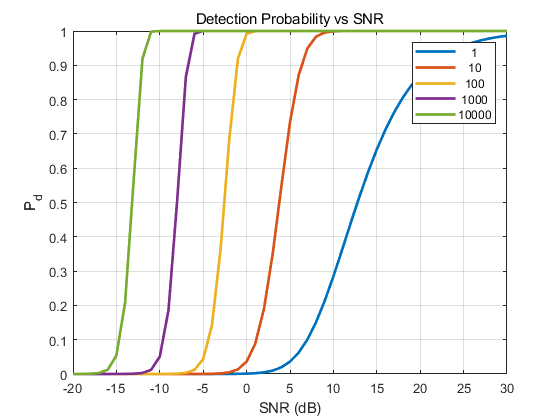

In [ ]:
% Detection Performance
clear;clc;close all;
% Parameters
M = power(10,0:4); % 
pfa = 1e-6;
snr_dB = -20:1:30; 
snr = db2pow(snr_dB); 

for i = 1:numel(M)
thresh = chi2inv(1 - pfa, 2 * M(i));
% Detection probability calculation
Pd(i,:) = 1 - chi2cdf(thresh ./ (snr + 1), 2 * M(i));
end %for

% Plot Pd vs SMR
figure;
plot(snr_dB, Pd', 'LineWidth', 2);
legend(num2str(M'));
xlabel('SNR (dB)');
ylabel('P_d');
grid on;
title('P_d vs SNR');

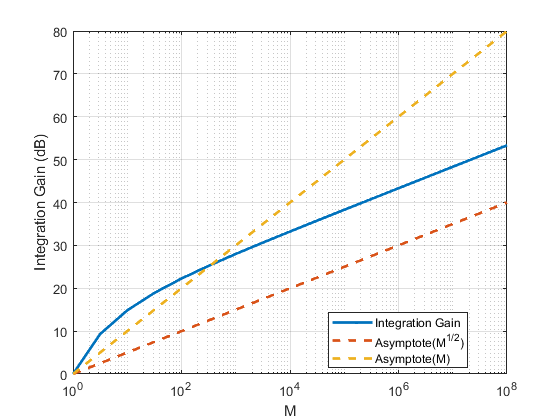

In [10]:
% Integration Gain
clear,clc;close all;
pfa = 1e-6;
pd = 0.9;
M = power(10,0:0.5:8);
snr_rayleigh = chi2inv(1-pfa,2*M) ./ chi2inv(1-pd,2*M) - 1;
InteGain = pow2db(snr_rayleigh(1)) - pow2db(snr_rayleigh);

asymptote_sqrtM = pow2db(sqrt(M')); %dB
asymptote_M = pow2db(M'); %dB

% plot
figure;
semilogx(M, InteGain, 'LineWidth', 2);
hold on;
semilogx(M, asymptote_sqrtM, '--', 'LineWidth', 2);
hold on;
semilogx(M, asymptote_M, '--', 'LineWidth', 2);
grid on;
legend('Integration Gain','Asymptote(M^{1/2})','Asymptote(M)','Location','best');
xlabel('M');
ylabel('Integration Gain (dB)');